In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import Functions.PCA as pca
import Functions.data_load as dat
import Functions.visualization as vis
import Functions.average_img as avg
import Functions.k_nearest as knn

#load data
train_array, test_array = dat.load_data()
cleaned_arr = dat.clean_train_arr()
z_arr = pca.z_arr(cleaned_arr)


In [2]:
pca.arr_only(z_arr, pca.create_sorted_eigenvec(30))

numpy.ndarray

In [2]:
train_arr_cleaned_df = pd.read_csv("data/pca/cleaned_train_array.csv", header = None)
train_arr_cleaned = train_arr_cleaned_df.to_numpy()

In [11]:
z_array = pca.z_arr(train_arr_cleaned)

df = pd.DataFrame(z_array)
df.to_csv('data/pca/z_array.csv', index=None, header=None)

In [12]:
knn.kNN(train_array, pca.arr_only(pca.z_arr(cleaned_arr), pca.create_sorted_eigenvec(30)), pca.image_only(z_arr[2,:], pca.create_sorted_eigenvec(30)), 5, train=True)

NameError: name 'knn' is not defined

In [19]:
def validation_kNN_train(s_size, k=5, PC=30):
    true = 0
    false = 0
    eigenvectors_sorted = pca.create_sorted_eigenvec(PC)
    pca_arr = pca.arr_only(z_arr, eigenvectors_sorted)
    
    for i in range(0, s_size):

        z_image = z_arr[29500+i, :]
        pca_img = pca.image_only(z_image, eigenvectors_sorted)


        result_kNN = knn.kNN(train_array, pca_arr, pca_img, k, train=True)
        if result_kNN == train_array[29500+i, 0]:
            true += 1
        else:
            false += 1

    return print(f'Anzahl richtig erkannter Digits: {true}\n\
Anzahl falsch erkannter Digits: {false}\n\
\nAnteil richtiger Vorhersagen: {(true/s_size)*100}%')

In [8]:
knn.validation_kNN_train(1000, k=10, PC = 7)

Anzahl richtig erkannter Digits: 847
Anzahl falsch erkannter Digits: 153

Anteil richtiger Vorhersagen: 84.7%


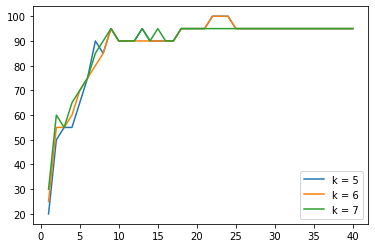

In [27]:
val_arr1[:,0]
PCs = list(range(1, 41))
plt.plot(PCs, val_arr1[:,0], label = "k = 5")
plt.plot(PCs, val_arr1[:,1], label = "k = 6")
plt.plot(PCs, val_arr1[:,2], label = "k = 7")
plt.legend()

In [12]:
val_arr1 = np.zeros((40, 3))
for i in range(1, 41):
    for j in range(5, 8):
        val_arr1[i-1, j-5] = knn.validation_kNN_train_matrix(20, k=j, PC=i)
val_arr1

array([[ 20.,  25.,  30.],
       [ 50.,  55.,  60.],
       [ 55.,  55.,  55.],
       [ 55.,  60.,  65.],
       [ 65.,  70.,  70.],
       [ 75.,  75.,  75.],
       [ 90.,  80.,  85.],
       [ 85.,  85.,  90.],
       [ 95.,  95.,  95.],
       [ 90.,  90.,  90.],
       [ 90.,  90.,  90.],
       [ 90.,  90.,  90.],
       [ 95.,  90.,  95.],
       [ 90.,  90.,  90.],
       [ 90.,  90.,  95.],
       [ 90.,  90.,  90.],
       [ 90.,  90.,  90.],
       [ 95.,  95.,  95.],
       [ 95.,  95.,  95.],
       [ 95.,  95.,  95.],
       [ 95.,  95.,  95.],
       [100., 100.,  95.],
       [100., 100.,  95.],
       [100., 100.,  95.],
       [ 95.,  95.,  95.],
       [ 95.,  95.,  95.],
       [ 95.,  95.,  95.],
       [ 95.,  95.,  95.],
       [ 95.,  95.,  95.],
       [ 95.,  95.,  95.],
       [ 95.,  95.,  95.],
       [ 95.,  95.,  95.],
       [ 95.,  95.,  95.],
       [ 95.,  95.,  95.],
       [ 95.,  95.,  95.],
       [ 95.,  95.,  95.],
       [ 95.,  95.,  95.],
 

In [7]:
#5:50 mit 10
#8:50 mit 20
val_arr = np.zeros((30, 10))
for i in range(1, 31):
    for j in range(1, 11):
        val_arr[i-1, j-1] = knn.validation_kNN_train_matrix(1000, k=j, PC=i)
val_arr

df = pd.DataFrame(val_arr)

df.to_csv('data/val_array2.csv', index=None, header=None)


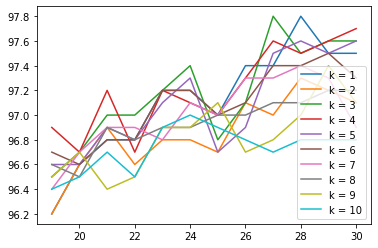

In [19]:
PCs = list(range(19, 31))
for i in range(0,10):
    plt.plot(PCs, val_arr[18:30 ,i], label = f"k = {i+1}")
plt.legend()

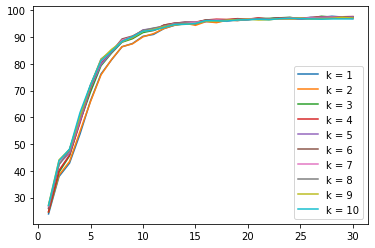

In [8]:
PCs = list(range(1, 31))
plt.plot(PCs, val_arr[:,0], label = "k = 1")
plt.plot(PCs, val_arr[:,1], label = "k = 2")
plt.plot(PCs, val_arr[:,2], label = "k = 3")
plt.plot(PCs, val_arr[:,3], label = "k = 4")
plt.plot(PCs, val_arr[:,4], label = "k = 5")
plt.plot(PCs, val_arr[:,5], label = "k = 6")
plt.plot(PCs, val_arr[:,6], label = "k = 7")
plt.plot(PCs, val_arr[:,7], label = "k = 8")
plt.plot(PCs, val_arr[:,8], label = "k = 9")
plt.plot(PCs, val_arr[:,9], label = "k = 10")
plt.legend()